In [7]:
%matplotlib inline
%pylab inline

import pandas as pd
import seaborn as sns
from pipe import as_list

Populating the interactive namespace from numpy and matplotlib


In [8]:
data1 = np.random.laplace(size=10000)
data2 = np.random.normal(100, 24, 10000)

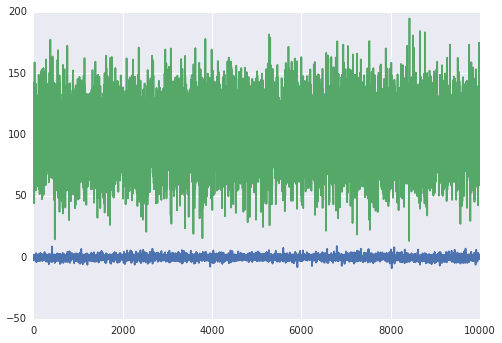

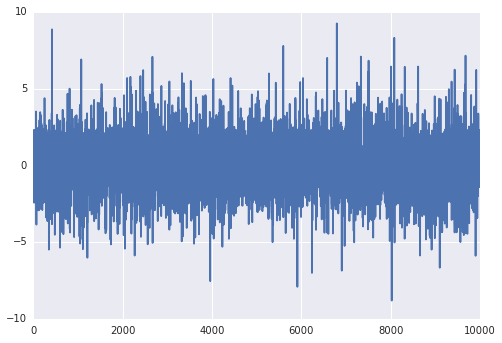

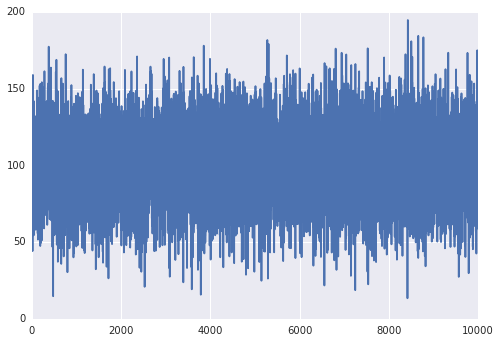

In [9]:
# multi figure
plot(data1)
plot(data2)

figure()
plot(data1)

figure()
plot(data2)

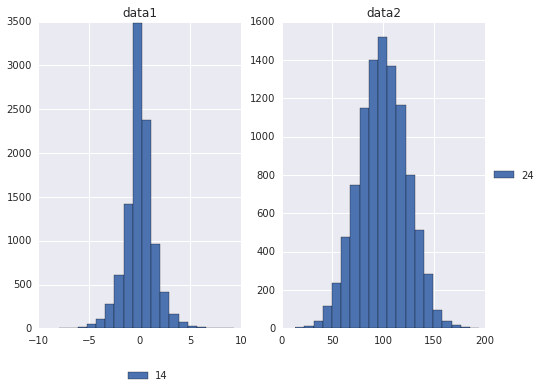

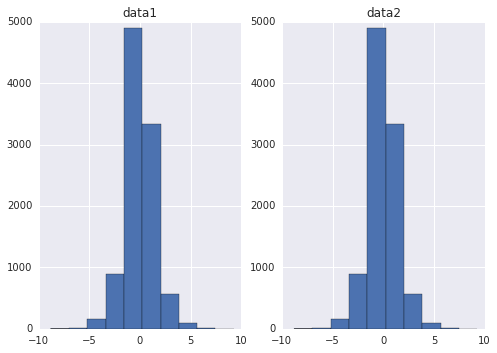

In [10]:
# subplot
subplot(121)
title('data1')
r = hist(data1, bins=20, label='14')
legend(loc='lower left', bbox_to_anchor=(0.4, -0.2)) 

subplot(122)
title('data2')
r = hist(data2, bins=20, label='24')
legend(loc='center left', bbox_to_anchor=(1, 0.5)) 


# pandas
figure()
df1, df2 = map(pd.DataFrame, (data1, data2))

# subplot 1
ax = subplot(121)    # fig, axes = subplots(1, 2)
df1[0].hist(ax=ax)   # ax=axes[0]
ax.set_title('data1')

# subplot 2
ax = subplot(122)
ax.set_title('data2')
df1[0].hist(ax=ax)   # ax=axex[1]

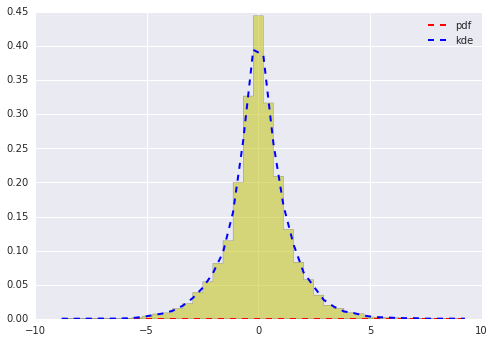

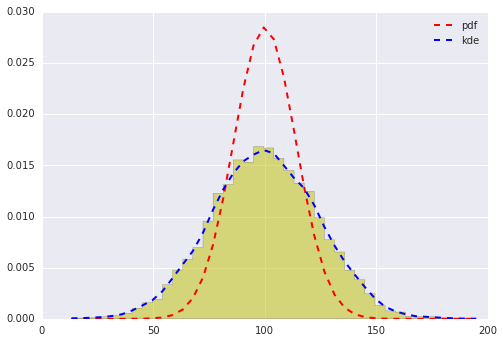

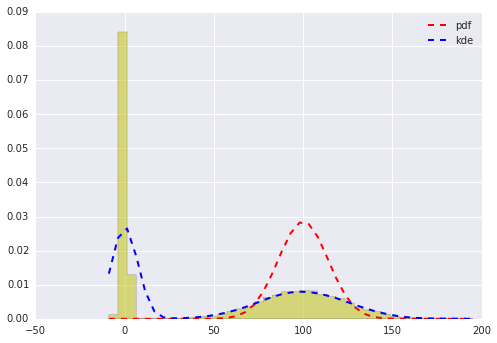

In [11]:
# hist with line
for data in (data1, data2, np.hstack([data1, data2])):
    figure()
    n, bins, patches = hist(data, alpha=0.5, normed=1, bins=40, color='y', histtype='stepfilled')
    plot(bins, mlab.normpdf(bins, 100, 14), 'r--', linewidth=2, label='pdf')

    # kernel density evaluate
    from scipy.stats import gaussian_kde
    
    X = np.array([data])
    kernel = gaussian_kde(X)
    z = kernel(bins)
    plot(bins, z, 'b--', linewidth=2, label='kde')
    legend()

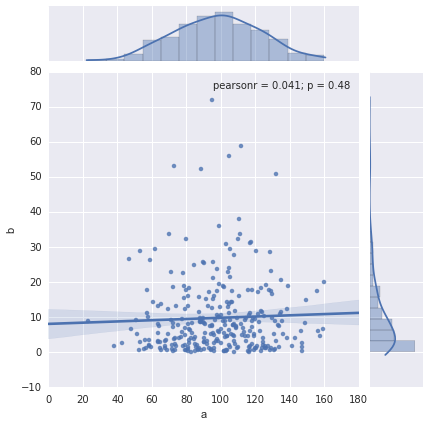

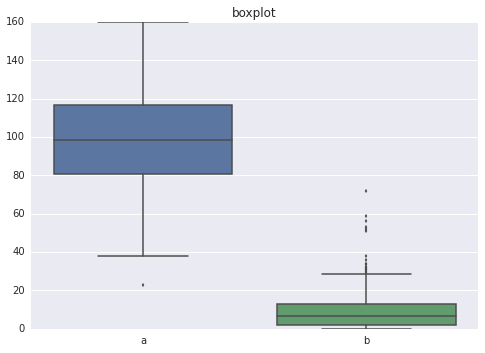

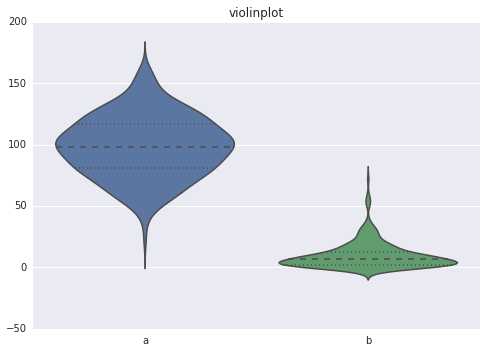

In [12]:
dataset = map( pd.DataFrame, ( np.random.normal(100, 24, 300), np.random.exponential(10, 300) ) ) | as_list
df = pd.concat(dataset, axis=1)
df.columns = ['a', 'b']


sns.jointplot('a', 'b', df, kind='reg')

figure()
title('boxplot')
sns.boxplot(df)

figure()
title('violinplot')
sns.violinplot(df)


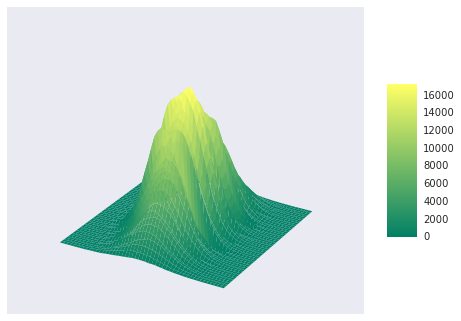

In [15]:
from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.animation as animation

n_grid = 50

data3 = []
for i in range(250, 0, -10):
    data3.append(np.random.normal(100, 24, size=i * 1000))
data3 = np.hstack([data3[::-1], data3])

data3 = np.array(data3)
X = np.arange(n_grid)
Y = np.arange(n_grid)
X, Y = np.meshgrid(X, Y)
Z = []
for d in data3:
    _z, bins = np.histogram(d, bins=n_grid)
    Z.append(_z)
    
Z = np.array(Z)

my_cmap = matplotlib.cm.get_cmap('summer')
# my_cmap.set_under('w')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_axis_off()
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=my_cmap, linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)


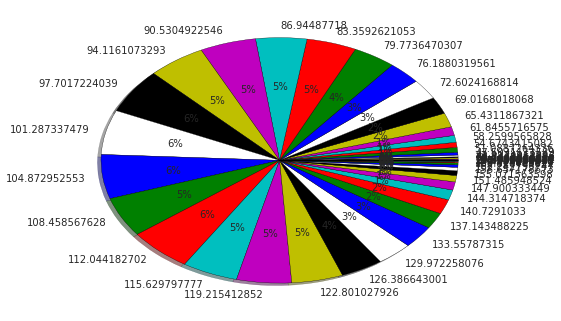

In [14]:
sizes = _z
labels = bins[1:] + np.diff(bins) / 2

figure()
r = pie(sizes, labels=labels, autopct='%1.0f%%', shadow=True)